In [64]:
pip install pykalman

  Using cached pykalman-0.9.7-py2.py3-none-any.whl.metadata (5.5 kB)
Using cached pykalman-0.9.7-py2.py3-none-any.whl (251 kB)
Note: you may need to restart the kernel to use updated packages.


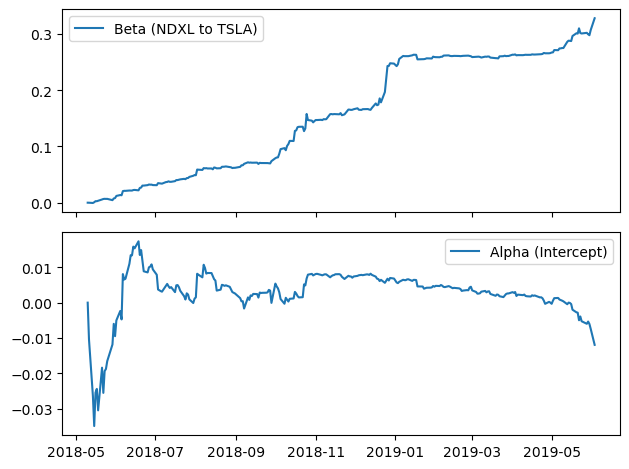

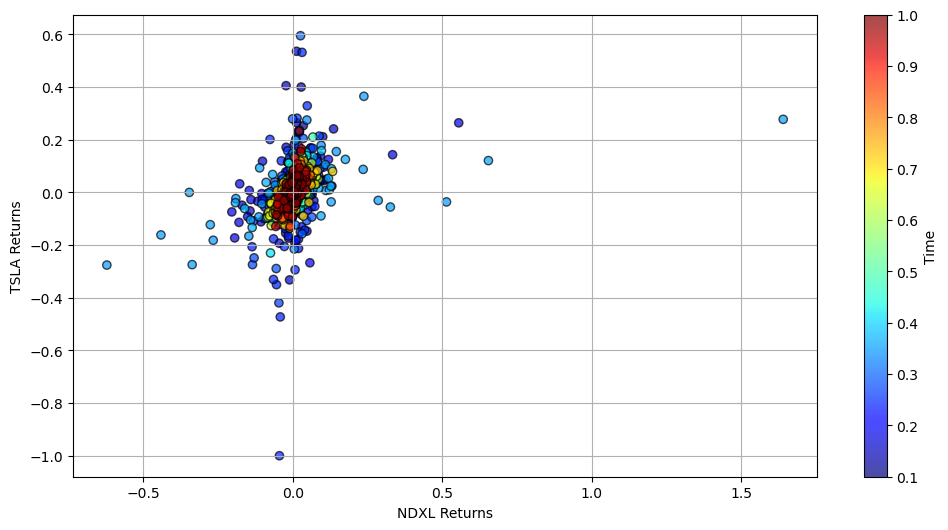

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Load normalized data
tsla_data = pd.read_csv('/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/TSLA_Normalised_OHLC_VWAP_VOL.csv', index_col='Date', parse_dates=True)
ndxl_data = pd.read_csv('/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/NDXL_Normalised_OHLC_VWAP_VOL.csv', index_col='Date', parse_dates=True)

# Ensure both datasets are aligned by date
data = pd.concat([tsla_data['Close_Price'], ndxl_data['Close_Price']], axis=1)
data.columns = ['TSLA', 'NDXL']

# Calculate returns
data['TSLA_returns'] = data['TSLA'].pct_change().fillna(0)
data['NDXL_returns'] = data['NDXL'].pct_change().fillna(0)

# Observation matrix
obs_mat = np.vstack([data['NDXL_returns'], np.ones(data['NDXL_returns'].shape[0])]).T

# Initialize the Kalman Filter
delta = 1e-5
trans_cov = delta / (1 - delta) * np.eye(2)  # Transition covariance
kf = KalmanFilter(
    n_dim_obs=1,  # y is 1-dimensional (TSLA returns)
    n_dim_state=2,  # state is 2-dimensional (beta and alpha)
    initial_state_mean=np.zeros(2),
    initial_state_covariance=np.eye(2),
    transition_matrices=np.eye(2),
    observation_matrices=obs_mat[:, np.newaxis],  # Correct shape for observations
    observation_covariance=1.0,
    transition_covariance=trans_cov
)

# Use the observations to get running estimates and errors for the state parameters
state_means, state_covs = kf.filter(data['TSLA_returns'].values)

# Plotting results
_, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(data.index, state_means[:, 0], label='Beta (NDXL to TSLA)')
axarr[0].legend()
axarr[1].plot(data.index, state_means[:, 1], label='Alpha (Intercept)')
axarr[1].legend()
plt.tight_layout()
plt.show()

# Visualization of the linear model evolution
plt.figure(figsize=(12, 6))
colors = np.linspace(0.1, 1, len(data))
sc = plt.scatter(data['NDXL_returns'], data['TSLA_returns'], c=colors, cmap='jet', edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.set_label('Time')
plt.xlabel('NDXL Returns')
plt.ylabel('TSLA Returns')
plt.grid(True)
plt.show()

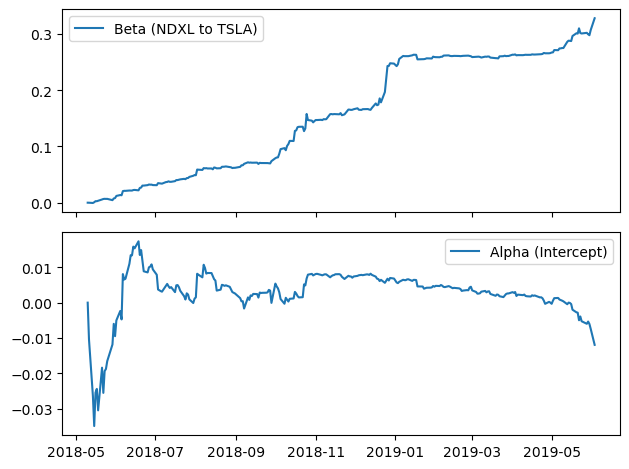

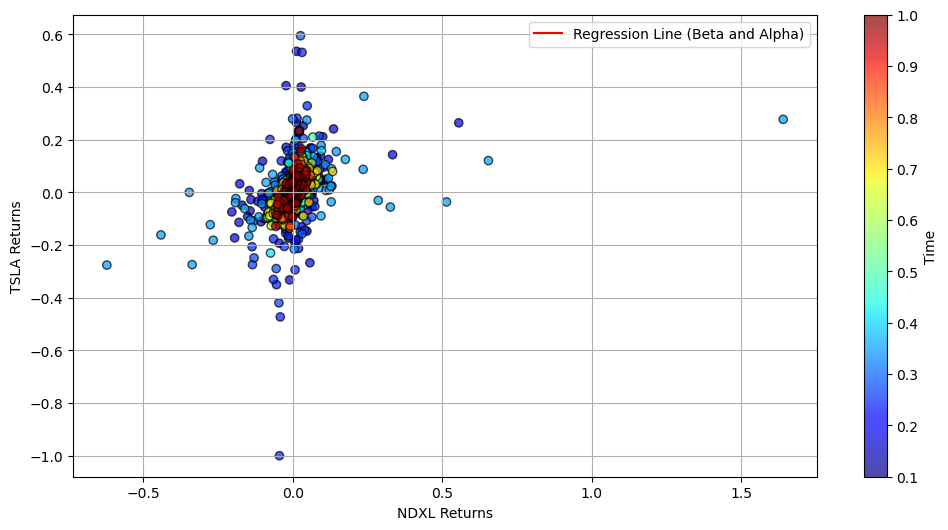

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Load normalized data
tsla_data = pd.read_csv('/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/TSLA_Normalised_OHLC_VWAP_VOL.csv', index_col='Date', parse_dates=True)
ndxl_data = pd.read_csv('/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/NDXL_Normalised_OHLC_VWAP_VOL.csv', index_col='Date', parse_dates=True)

# Ensure both datasets are aligned by date
data = pd.concat([tsla_data['Close_Price'], ndxl_data['Close_Price']], axis=1)
data.columns = ['TSLA', 'NDXL']

# Calculate returns
data['TSLA_returns'] = data['TSLA'].pct_change().fillna(0)
data['NDXL_returns'] = data['NDXL'].pct_change().fillna(0)

# Observation matrix
obs_mat = np.vstack([data['NDXL_returns'], np.ones(data['NDXL_returns'].shape[0])]).T

# Initialize the Kalman Filter
delta = 1e-5
trans_cov = delta / (1 - delta) * np.eye(2)  # Transition covariance
kf = KalmanFilter(
    n_dim_obs=1,  # y is 1-dimensional (TSLA returns)
    n_dim_state=2,  # state is 2-dimensional (beta and alpha)
    initial_state_mean=np.zeros(2),
    initial_state_covariance=np.eye(2),
    transition_matrices=np.eye(2),
    observation_matrices=obs_mat[:, np.newaxis],  # Correct shape for observations
    observation_covariance=1.0,
    transition_covariance=trans_cov
)

# Use the observations to get running estimates and errors for the state parameters
state_means, state_covs = kf.filter(data['TSLA_returns'].values)

# Plotting results
_, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(data.index, state_means[:, 0], label='Beta (NDXL to TSLA)')
axarr[0].legend()
axarr[1].plot(data.index, state_means[:, 1], label='Alpha (Intercept)')
axarr[1].legend()
plt.tight_layout()
plt.show()

# Visualization of the linear model evolution
plt.figure(figsize=(12, 6))
colors = np.linspace(0.1, 1, len(data))
sc = plt.scatter(data['NDXL_returns'], data['TSLA_returns'], c=colors, cmap='jet', edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.set_label('Time')

# Add regression line
beta = np.mean(state_means[:, 0])  # Average beta
alpha = np.mean(state_means[:, 1])  # Average alpha
x = np.linspace(data['NDXL_returns'].min(), data['NDXL_returns'].max(), 100)
y = beta * x + alpha
plt.plot(x, y, color='red', label='Regression Line (Beta and Alpha)')

plt.xlabel('NDXL Returns')
plt.ylabel('TSLA Returns')
plt.legend()
plt.grid(True)
plt.show()

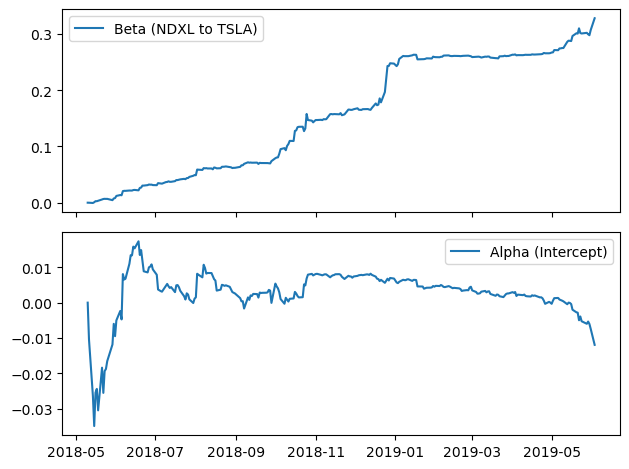

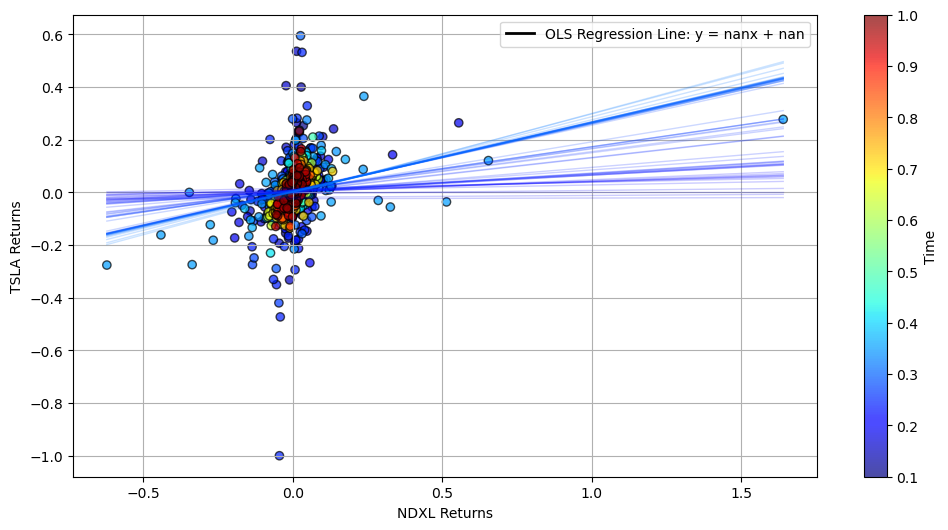

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Load normalized data
tsla_data = pd.read_csv('/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/TSLA_Normalised_OHLC_VWAP_VOL.csv', index_col='Date', parse_dates=True)
ndxl_data = pd.read_csv('/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/NDXL_Normalised_OHLC_VWAP_VOL.csv', index_col='Date', parse_dates=True)

# Ensure both datasets are aligned by date
data = pd.concat([tsla_data['Close_Price'], ndxl_data['Close_Price']], axis=1)
data.columns = ['TSLA', 'NDXL']

# Calculate returns
data['TSLA_returns'] = data['TSLA'].pct_change().fillna(0)
data['NDXL_returns'] = data['NDXL'].pct_change().fillna(0)

# Observation matrix
obs_mat = np.vstack([data['NDXL_returns'], np.ones(data['NDXL_returns'].shape[0])]).T

# Initialize the Kalman Filter
delta = 1e-5
trans_cov = delta / (1 - delta) * np.eye(2)  # Transition covariance
kf = KalmanFilter(
    n_dim_obs=1,  # y is 1-dimensional (TSLA returns)
    n_dim_state=2,  # state is 2-dimensional (beta and alpha)
    initial_state_mean=np.zeros(2),
    initial_state_covariance=np.eye(2),
    transition_matrices=np.eye(2),
    observation_matrices=obs_mat[:, np.newaxis],  # Correct shape for observations
    observation_covariance=1.0,
    transition_covariance=trans_cov
)

# Use the observations to get running estimates and errors for the state parameters
state_means, state_covs = kf.filter(data['TSLA_returns'].values)

# Plotting results
_, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(data.index, state_means[:, 0], label='Beta (NDXL to TSLA)')
axarr[0].legend()
axarr[1].plot(data.index, state_means[:, 1], label='Alpha (Intercept)')
axarr[1].legend()
plt.tight_layout()
plt.show()

# Visualization of the linear model evolution
plt.figure(figsize=(12, 6))
colors = np.linspace(0.1, 1, len(data))
sc = plt.scatter(data['NDXL_returns'], data['TSLA_returns'], c=colors, cmap='jet', edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.set_label('Time')

# Add every 5th regression line
step = 5
xi = np.linspace(data['NDXL_returns'].min(), data['NDXL_returns'].max(), 100)
colors_step = np.linspace(0.1, 1, len(state_means[::step]))
for i, (beta, alpha) in enumerate(state_means[::step]):
    yi = beta * xi + alpha
    plt.plot(xi, yi, alpha=0.2, lw=1, color=plt.cm.jet(colors_step[i]))

# Add OLS regression line for comparison
ols_beta = np.polyfit(data['NDXL_returns'], data['TSLA_returns'], 1)[0]
ols_alpha = np.polyfit(data['NDXL_returns'], data['TSLA_returns'], 1)[1]
ols_line = ols_beta * xi + ols_alpha
plt.plot(xi, ols_line, color='black', lw=2, label=f'OLS Regression Line: y = {ols_beta:.2f}x + {ols_alpha:.2f}')

plt.xlabel('NDXL Returns')
plt.ylabel('TSLA Returns')
plt.legend()
plt.grid(True)
plt.show()

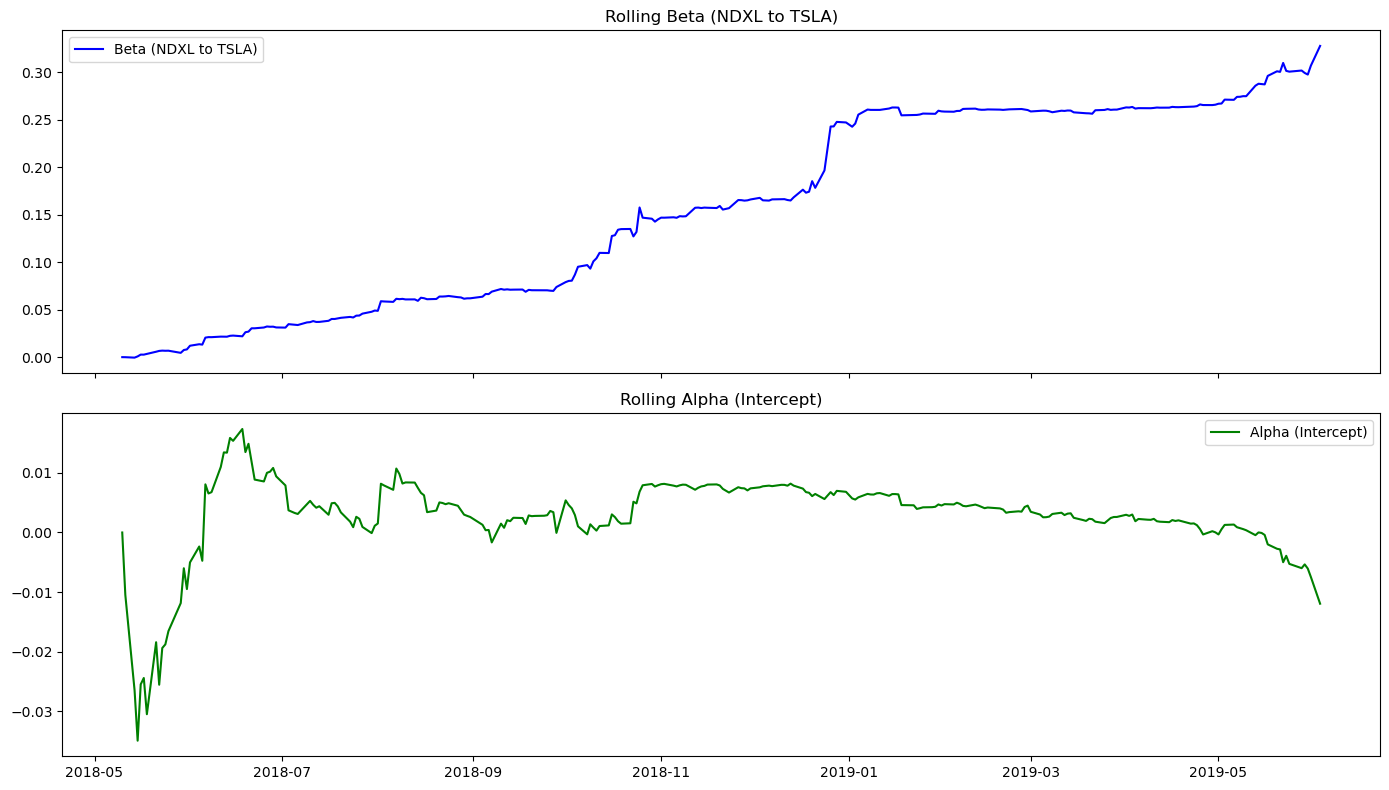

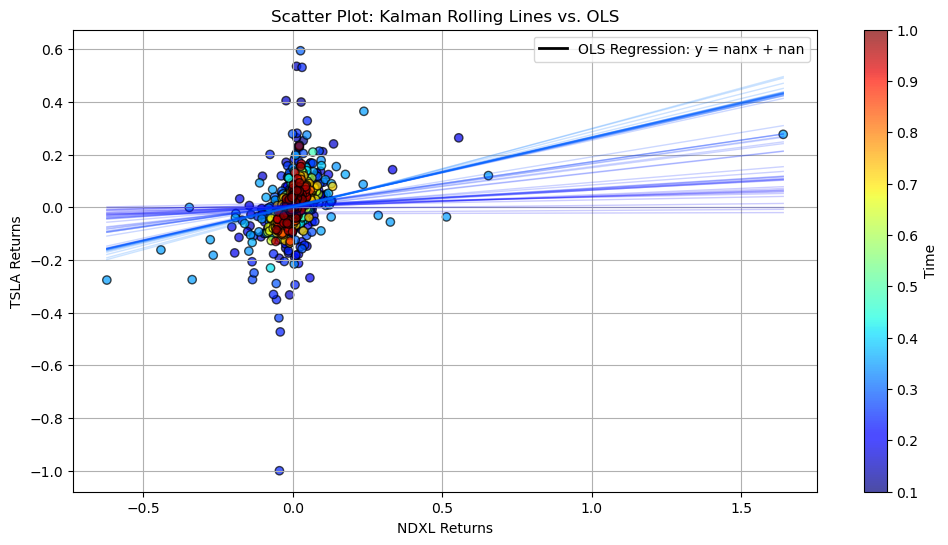

DataFrame shape: (1665, 4)
Date range in data: 2018-05-10 00:00:00-04:00 to 2024-12-19 00:00:00-05:00
State means shape: (1665, 2)
Number of data points in returns: 1665


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# --- Load and clean TSLA data ---
# If your CSV has Date in the first column, you can do:
#   tsla_data = pd.read_csv('...', parse_dates=[0], index_col=0)
#   tsla_data.columns = [col.strip() for col in tsla_data.columns]
# Adjust for duplicates if necessary.
tsla_data = pd.read_csv(
    '/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/TSLA_Normalised_OHLC_VWAP_VOL.csv',
    parse_dates=True,
    index_col='Date'
)
# If there are true duplicated index rows, remove them:
tsla_data = tsla_data.loc[~tsla_data.index.duplicated(keep='first')]

# --- Load and clean NDXL data ---
ndxl_data = pd.read_csv(
    '/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/NDXL_Normalised_OHLC_VWAP_VOL.csv',
    parse_dates=True,
    index_col='Date'
)
ndxl_data = ndxl_data.loc[~ndxl_data.index.duplicated(keep='first')]

# --- Concatenate the two Close_Price series ---
# Using outer join preserves all dates from both sets
data = pd.concat([tsla_data['Close_Price'], ndxl_data['Close_Price']], 
                 axis=1, join='outer')
data.columns = ['TSLA', 'NDXL']

# You can choose to fill forward or backward if some data is missing:
# data = data.ffill().bfill()
# Or simply drop rows that are missing either:
data = data.dropna(subset=['TSLA', 'NDXL'])

# --- Now calculate returns ---
data['TSLA_returns'] = data['TSLA'].pct_change().fillna(0)
data['NDXL_returns'] = data['NDXL'].pct_change().fillna(0)

# --- Prepare the observation matrix for the Kalman Filter ---
obs_mat = np.vstack([data['NDXL_returns'], np.ones(data['NDXL_returns'].shape[0])]).T

# --- Initialize the Kalman Filter ---
delta = 1e-5
trans_cov = delta / (1 - delta) * np.eye(2)  # Transition covariance
kf = KalmanFilter(
    n_dim_obs=1,  # y is 1-dimensional (TSLA returns)
    n_dim_state=2,  # state is 2-dimensional (beta and alpha)
    initial_state_mean=np.zeros(2),
    initial_state_covariance=np.eye(2),
    transition_matrices=np.eye(2),
    observation_matrices=obs_mat[:, np.newaxis],  # shape: (n_samples, 1, 2)
    observation_covariance=1.0,
    transition_covariance=trans_cov
)

# --- Run the filter to get rolling estimates of Beta & Alpha ---
state_means, state_covs = kf.filter(data['TSLA_returns'].values)

# --- Plot Beta and Alpha over time ---
fig, axarr = plt.subplots(2, sharex=True, figsize=(14, 8))

axarr[0].plot(data.index, state_means[:, 0], label='Beta (NDXL to TSLA)', color='blue')
axarr[0].set_title('Rolling Beta (NDXL to TSLA)')
axarr[0].legend()

axarr[1].plot(data.index, state_means[:, 1], label='Alpha (Intercept)', color='green')
axarr[1].set_title('Rolling Alpha (Intercept)')
axarr[1].legend()

plt.tight_layout()
plt.show()

# --- Scatter plot with rolling regression lines ---
plt.figure(figsize=(12, 6))
colors = np.linspace(0.1, 1, len(data))
sc = plt.scatter(
    data['NDXL_returns'], data['TSLA_returns'],
    c=colors, cmap='jet', edgecolor='k', alpha=0.7
)
cb = plt.colorbar(sc)
cb.set_label('Time')

# Add every 5th regression line
step = 5
xi = np.linspace(data['NDXL_returns'].min(), data['NDXL_returns'].max(), 100)
colors_step = np.linspace(0.1, 1, len(state_means[::step]))
for i, (beta, alpha) in enumerate(state_means[::step]):
    yi = beta * xi + alpha
    plt.plot(xi, yi, alpha=0.2, lw=1, color=plt.cm.jet(colors_step[i]))

# Add OLS regression line for comparison
ols_beta, ols_alpha = np.polyfit(data['NDXL_returns'], data['TSLA_returns'], 1)
ols_line = ols_beta * xi + ols_alpha
plt.plot(xi, ols_line, color='black', lw=2,
         label=f'OLS Regression: y = {ols_beta:.2f}x + {ols_alpha:.2f}')

plt.xlabel('NDXL Returns')
plt.ylabel('TSLA Returns')
plt.legend()
plt.grid(True)
plt.title('Scatter Plot: Kalman Rolling Lines vs. OLS')
plt.show()

# --- Diagnostics ---
print("DataFrame shape:", data.shape)
print("Date range in data:", data.index.min(), "to", data.index.max())
print("State means shape:", state_means.shape)
print("Number of data points in returns:", len(data['TSLA_returns']))

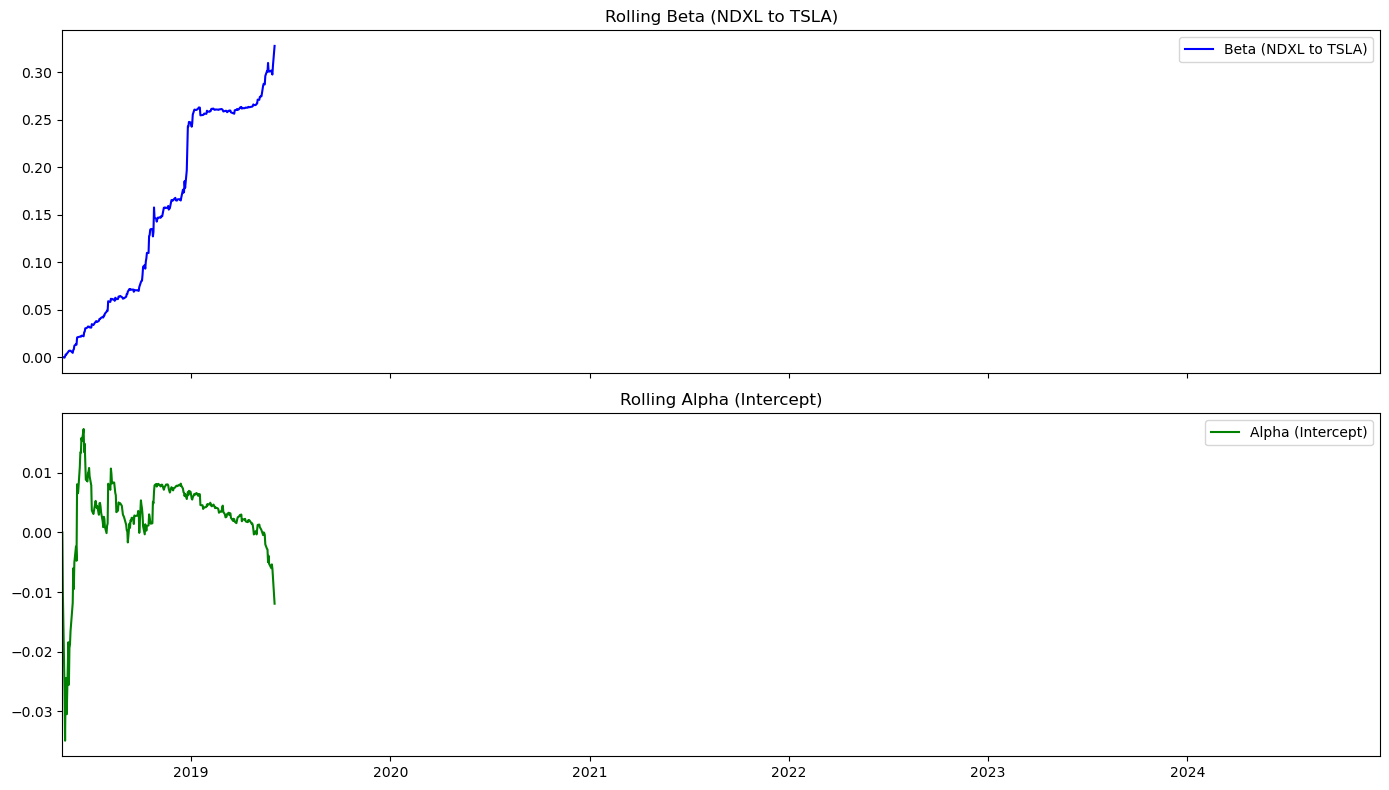

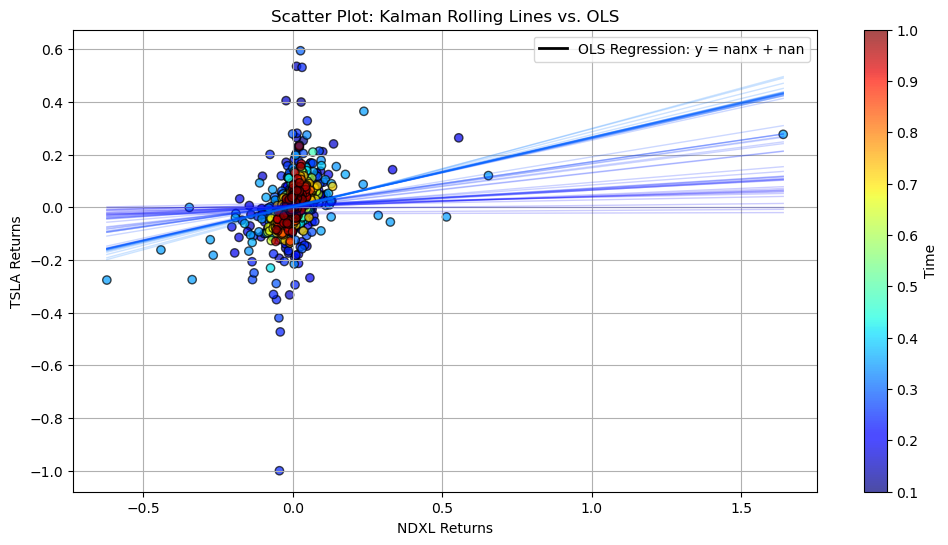

DataFrame shape: (1665, 4)
Date range in data: 2018-05-10 00:00:00-04:00 to 2024-12-19 00:00:00-05:00
State means shape: (1665, 2)
Number of data points in returns: 1665


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# --- Load and clean TSLA data ---
tsla_data = pd.read_csv(
    '/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/TSLA_Normalised_OHLC_VWAP_VOL.csv',
    parse_dates=True,
    index_col='Date'
)
# If there are true duplicated index rows, remove them
tsla_data = tsla_data.loc[~tsla_data.index.duplicated(keep='first')]

# --- Load and clean NDXL data ---
ndxl_data = pd.read_csv(
    '/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/NDXL_Normalised_OHLC_VWAP_VOL.csv',
    parse_dates=True,
    index_col='Date'
)
ndxl_data = ndxl_data.loc[~ndxl_data.index.duplicated(keep='first')]

# --- Concatenate the two Close_Price series (outer join) ---
data = pd.concat([tsla_data['Close_Price'], ndxl_data['Close_Price']], 
                 axis=1, join='outer')
data.columns = ['TSLA', 'NDXL']

# Drop rows missing TSLA or NDXL
data.dropna(subset=['TSLA', 'NDXL'], inplace=True)

# --- Make sure the index is sorted and remove time zones ---
data.sort_index(inplace=True)

# --- Calculate returns ---
data['TSLA_returns'] = data['TSLA'].pct_change().fillna(0)
data['NDXL_returns'] = data['NDXL'].pct_change().fillna(0)

# --- Prepare the observation matrix for the Kalman Filter ---
obs_mat = np.vstack([data['NDXL_returns'], np.ones(data['NDXL_returns'].shape[0])]).T

# --- Initialize the Kalman Filter ---
delta = 1e-5
trans_cov = delta / (1 - delta) * np.eye(2)  # Transition covariance
kf = KalmanFilter(
    n_dim_obs=1,  # y is 1-dimensional (TSLA returns)
    n_dim_state=2,  # state is 2-dimensional (beta and alpha)
    initial_state_mean=np.zeros(2),
    initial_state_covariance=np.eye(2),
    transition_matrices=np.eye(2),
    observation_matrices=obs_mat[:, np.newaxis],  # shape: (n_samples, 1, 2)
    observation_covariance=1.0,
    transition_covariance=trans_cov
)

# --- Run the filter to get rolling estimates of Beta & Alpha ---
state_means, state_covs = kf.filter(data['TSLA_returns'].values)

# --- Plot Beta and Alpha over time ---
fig, axarr = plt.subplots(2, sharex=True, figsize=(14, 8))

axarr[0].plot(data.index, state_means[:, 0], label='Beta (NDXL to TSLA)', color='blue')
axarr[0].set_title('Rolling Beta (NDXL to TSLA)')
axarr[0].legend()

axarr[1].plot(data.index, state_means[:, 1], label='Alpha (Intercept)', color='green')
axarr[1].set_title('Rolling Alpha (Intercept)')
axarr[1].legend()

# Force x-axis to the entire date range if desired
axarr[0].set_xlim([data.index.min(), data.index.max()])

plt.tight_layout()
plt.show()

# --- Scatter plot with rolling regression lines ---
plt.figure(figsize=(12, 6))
colors = np.linspace(0.1, 1, len(data))
sc = plt.scatter(
    data['NDXL_returns'], data['TSLA_returns'],
    c=colors, cmap='jet', edgecolor='k', alpha=0.7
)
cb = plt.colorbar(sc)
cb.set_label('Time')

# Add every 5th regression line
step = 5
xi = np.linspace(data['NDXL_returns'].min(), data['NDXL_returns'].max(), 100)
colors_step = np.linspace(0.1, 1, len(state_means[::step]))
for i, (beta, alpha) in enumerate(state_means[::step]):
    yi = beta * xi + alpha
    plt.plot(xi, yi, alpha=0.2, lw=1, color=plt.cm.jet(colors_step[i]))

# Add OLS regression line for comparison
ols_beta, ols_alpha = np.polyfit(data['NDXL_returns'], data['TSLA_returns'], 1)
ols_line = ols_beta * xi + ols_alpha
plt.plot(xi, ols_line, color='black', lw=2,
         label=f'OLS Regression: y = {ols_beta:.2f}x + {ols_alpha:.2f}')

plt.xlabel('NDXL Returns')
plt.ylabel('TSLA Returns')
plt.legend()
plt.grid(True)
plt.title('Scatter Plot: Kalman Rolling Lines vs. OLS')
plt.show()

# --- Diagnostics ---
print("DataFrame shape:", data.shape)
print("Date range in data:", data.index.min(), "to", data.index.max())
print("State means shape:", state_means.shape)
print("Number of data points in returns:", len(data['TSLA_returns']))


--- TSLA Data ---
TSLA shape: (1665, 7)
TSLA columns: ['Date.1', 'Open_Price', 'High_Price', 'Low_Price', 'Close_Price', 'Volatility', 'VWAP']
TSLA index range: 2018-05-10 00:00:00-04:00 to 2024-12-19 00:00:00-05:00
TSLA NaN counts:
 Date.1         0
Open_Price     0
High_Price     0
Low_Price      0
Close_Price    0
Volatility     0
VWAP           0
dtype: int64
Last 5 TSLA rows:
                                               Date.1  Open_Price  High_Price  \
Date                                                                           
2024-12-13 00:00:00-05:00  2024-12-13 00:00:00-05:00    0.879481    0.890274   
2024-12-16 00:00:00-05:00  2024-12-16 00:00:00-05:00    0.924950    0.946754   
2024-12-17 00:00:00-05:00  2024-12-17 00:00:00-05:00    1.000000    0.990443   
2024-12-18 00:00:00-05:00  2024-12-18 00:00:00-05:00    0.979734    1.000000   
2024-12-19 00:00:00-05:00  2024-12-19 00:00:00-05:00    0.948213    0.932408   

                           Low_Price  Close_Price  Vo

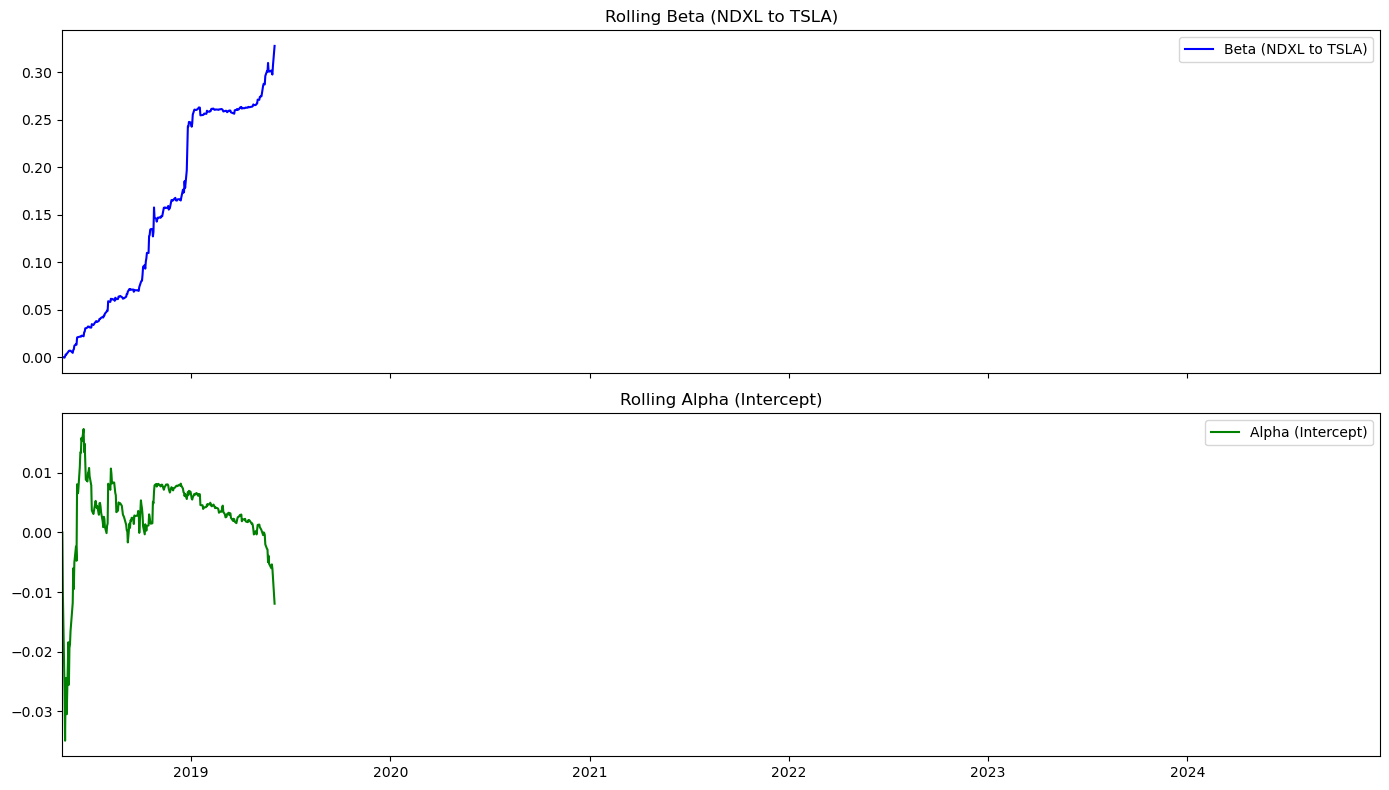

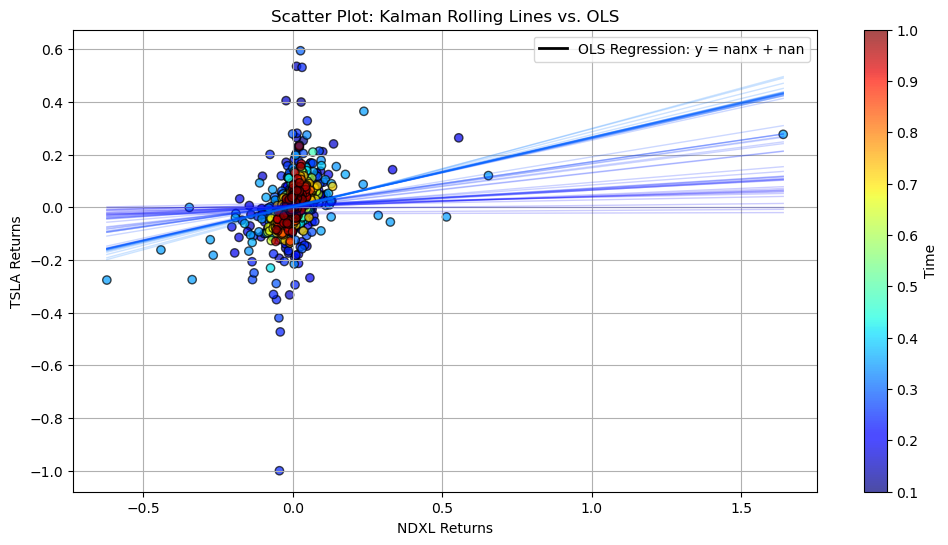


--- Final Diagnostics ---
Final DataFrame shape: (1665, 4)
Final date range: 2018-05-10 00:00:00-04:00 to 2024-12-19 00:00:00-05:00
State means shape: (1665, 2)
Number of data points in returns: 1665


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# ------------------------------------------------------------------------
# 1. Load TSLA data
# ------------------------------------------------------------------------
tsla_data = pd.read_csv(
    '/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/TSLA_Normalised_OHLC_VWAP_VOL.csv',
    parse_dates=True,
    index_col='Date'
)

# Ensure the columns have no trailing spaces
tsla_data.rename(columns=lambda x: x.strip(), inplace=True)

# Remove true duplicated index rows, if any
tsla_data = tsla_data.loc[~tsla_data.index.duplicated(keep='first')]

# Double-check TSLA basic info
print("\n--- TSLA Data ---")
print("TSLA shape:", tsla_data.shape)
print("TSLA columns:", tsla_data.columns.tolist())
print("TSLA index range:", tsla_data.index.min(), "to", tsla_data.index.max())
print("TSLA NaN counts:\n", tsla_data.isna().sum())
print("Last 5 TSLA rows:\n", tsla_data.tail(5))

# ------------------------------------------------------------------------
# 2. Load NDXL data
# ------------------------------------------------------------------------
ndxl_data = pd.read_csv(
    '/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/NDXL_Normalised_OHLC_VWAP_VOL.csv',
    parse_dates=True,
    index_col='Date'
)

# Strip column names
ndxl_data.rename(columns=lambda x: x.strip(), inplace=True)

# Remove duplicates
ndxl_data = ndxl_data.loc[~ndxl_data.index.duplicated(keep='first')]

# Double-check NDXL basic info
print("\n--- NDXL Data ---")
print("NDXL shape:", ndxl_data.shape)
print("NDXL columns:", ndxl_data.columns.tolist())
print("NDXL index range:", ndxl_data.index.min(), "to", ndxl_data.index.max())
print("NDXL NaN counts:\n", ndxl_data.isna().sum())
print("Last 5 NDXL rows:\n", ndxl_data.tail(5))

# ------------------------------------------------------------------------
# 3. Concatenate (outer join) TSLA and NDXL close prices
# ------------------------------------------------------------------------
data = pd.concat(
    [tsla_data['Close_Price'], ndxl_data['Close_Price']], 
    axis=1, 
    join='outer'
)
data.columns = ['TSLA', 'NDXL']

# Ensure the index is sorted
data.sort_index(inplace=True)

print("\n--- Merged Before Any NaN Handling ---")
print("Merged shape:", data.shape)
print("Merged index range:", data.index.min(), "to", data.index.max())
print("NaNs in Merged:\n", data.isna().sum())
print("Preview Merged tail:\n", data.tail(5))

# ------------------------------------------------------------------------
# 4. Decide how to handle missing data
#    Option A: forward-fill + backward-fill so we keep all dates
#    Option B: drop rows that have missing TSLA or NDXL
# ------------------------------------------------------------------------
data.ffill(inplace=True)  # Fill forward
data.bfill(inplace=True)  # Fill backward

# Now, ideally, there are no NaNs left.
print("\n--- After Forward/Backward Fill ---")
print("NaNs after fill:\n", data.isna().sum())
print("Index range after fill:", data.index.min(), "to", data.index.max())
print("Preview tail after fill:\n", data.tail(5))

# ------------------------------------------------------------------------
# 5. Calculate returns
# ------------------------------------------------------------------------
data['TSLA_returns'] = data['TSLA'].pct_change().fillna(0)
data['NDXL_returns'] = data['NDXL'].pct_change().fillna(0)

# Double-check date range again
print("\n--- After Returns Calculation ---")
print("Data shape:", data.shape)
print("Data index range:", data.index.min(), "to", data.index.max())
print("NaNs after returns:\n", data.isna().sum())

# ------------------------------------------------------------------------
# 6. Prepare the observation matrix for the Kalman Filter
# ------------------------------------------------------------------------
obs_mat = np.vstack([data['NDXL_returns'], np.ones(data['NDXL_returns'].shape[0])]).T

# ------------------------------------------------------------------------
# 7. Initialize and run the Kalman Filter
# ------------------------------------------------------------------------
delta = 1e-5
trans_cov = delta / (1 - delta) * np.eye(2)  # Transition covariance
kf = KalmanFilter(
    n_dim_obs=1,  # y is 1-dimensional (TSLA returns)
    n_dim_state=2,  # (beta, alpha)
    initial_state_mean=np.zeros(2),
    initial_state_covariance=np.eye(2),
    transition_matrices=np.eye(2),
    observation_matrices=obs_mat[:, np.newaxis],
    observation_covariance=1.0,
    transition_covariance=trans_cov
)

state_means, state_covs = kf.filter(data['TSLA_returns'].values)

# ------------------------------------------------------------------------
# 8. Plot Beta and Alpha over time
# ------------------------------------------------------------------------
fig, axarr = plt.subplots(2, sharex=True, figsize=(14, 8))

axarr[0].plot(data.index, state_means[:, 0], label='Beta (NDXL to TSLA)', color='blue')
axarr[0].set_title('Rolling Beta (NDXL to TSLA)')
axarr[0].legend()

axarr[1].plot(data.index, state_means[:, 1], label='Alpha (Intercept)', color='green')
axarr[1].set_title('Rolling Alpha (Intercept)')
axarr[1].legend()

# Force x-axis if you want to see the full range
axarr[0].set_xlim([data.index.min(), data.index.max()])

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------
# 9. Scatter plot with rolling regression lines
# ------------------------------------------------------------------------
plt.figure(figsize=(12, 6))
colors = np.linspace(0.1, 1, len(data))
sc = plt.scatter(
    data['NDXL_returns'], data['TSLA_returns'],
    c=colors, cmap='jet', edgecolor='k', alpha=0.7
)
cb = plt.colorbar(sc)
cb.set_label('Time')

# Add every 5th regression line
step = 5
xi = np.linspace(data['NDXL_returns'].min(), data['NDXL_returns'].max(), 100)
colors_step = np.linspace(0.1, 1, len(state_means[::step]))
for i, (beta, alpha) in enumerate(state_means[::step]):
    yi = beta * xi + alpha
    plt.plot(xi, yi, alpha=0.2, lw=1, color=plt.cm.jet(colors_step[i]))

# Add OLS regression line for comparison
ols_beta, ols_alpha = np.polyfit(data['NDXL_returns'], data['TSLA_returns'], 1)
ols_line = ols_beta * xi + ols_alpha
plt.plot(xi, ols_line, color='black', lw=2,
         label=f'OLS Regression: y = {ols_beta:.2f}x + {ols_alpha:.2f}')

plt.xlabel('NDXL Returns')
plt.ylabel('TSLA Returns')
plt.legend()
plt.grid(True)
plt.title('Scatter Plot: Kalman Rolling Lines vs. OLS')
plt.show()

# ------------------------------------------------------------------------
# 10. Final Diagnostics
# ------------------------------------------------------------------------
print("\n--- Final Diagnostics ---")
print("Final DataFrame shape:", data.shape)
print("Final date range:", data.index.min(), "to", data.index.max())
print("State means shape:", state_means.shape)
print("Number of data points in returns:", len(data['TSLA_returns']))

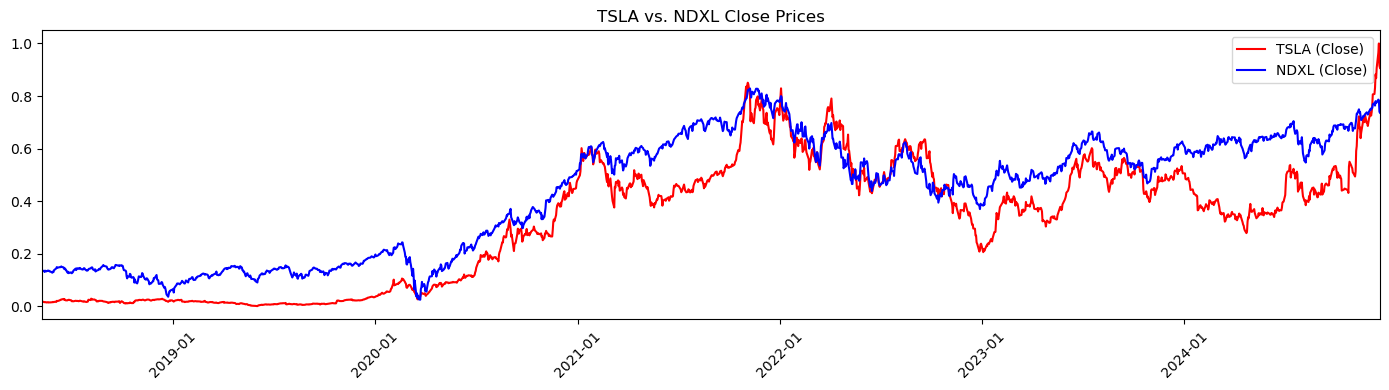

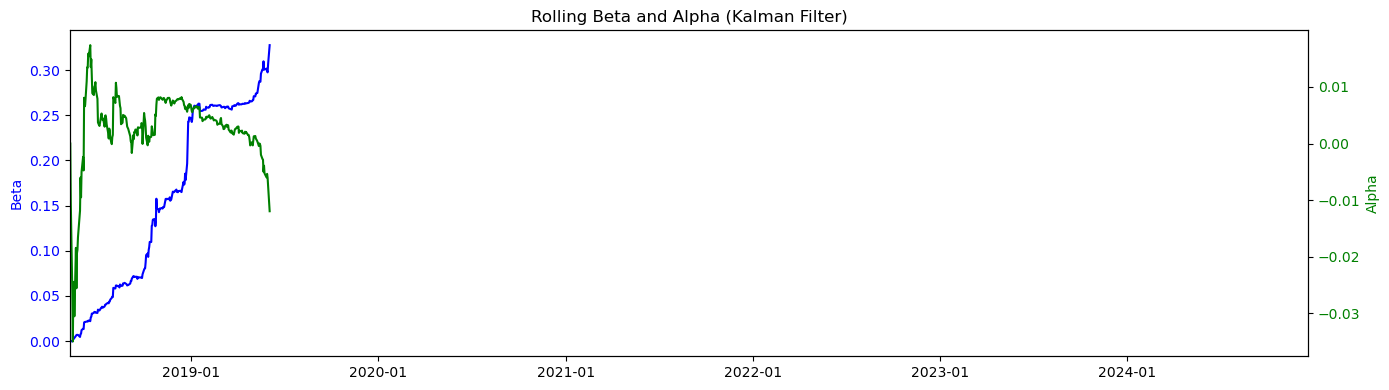

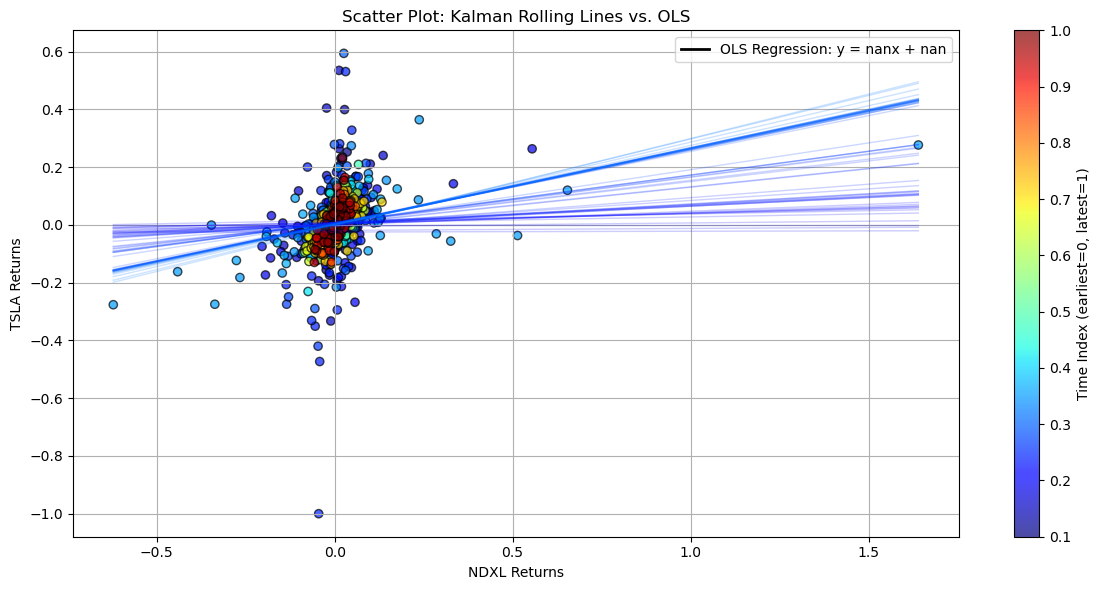


--- Final Diagnostics ---
Final DataFrame shape: (1665, 4)
Final date range: 2018-05-10 00:00:00-04:00 to 2024-12-19 00:00:00-05:00
State means shape: (1665, 2)
Number of data points in returns: 1665


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pykalman import KalmanFilter

# ------------------------------------------------------------------------
# 1. Load and clean TSLA data
# ------------------------------------------------------------------------
tsla_data = pd.read_csv(
    '/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/TSLA_Normalised_OHLC_VWAP_VOL.csv',
    parse_dates=True,
    index_col='Date'
)
tsla_data.rename(columns=lambda x: x.strip(), inplace=True)
tsla_data = tsla_data.loc[~tsla_data.index.duplicated(keep='first')]

# ------------------------------------------------------------------------
# 2. Load and clean NDXL data
# ------------------------------------------------------------------------
ndxl_data = pd.read_csv(
    '/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/NDXL_Normalised_OHLC_VWAP_VOL.csv',
    parse_dates=True,
    index_col='Date'
)
ndxl_data.rename(columns=lambda x: x.strip(), inplace=True)
ndxl_data = ndxl_data.loc[~ndxl_data.index.duplicated(keep='first')]

# ------------------------------------------------------------------------
# 3. Concatenate (outer join) TSLA and NDXL close prices
# ------------------------------------------------------------------------
data = pd.concat([tsla_data['Close_Price'], ndxl_data['Close_Price']], 
                 axis=1, join='outer')
data.columns = ['TSLA', 'NDXL']

# Sort and forward/backward fill to ensure no NaNs
data.sort_index(inplace=True)
data.ffill(inplace=True)
data.bfill(inplace=True)

# ------------------------------------------------------------------------
# 4. Calculate returns
# ------------------------------------------------------------------------
data['TSLA_returns'] = data['TSLA'].pct_change().fillna(0)
data['NDXL_returns'] = data['NDXL'].pct_change().fillna(0)

# ------------------------------------------------------------------------
# 5. Prepare the observation matrix for the Kalman Filter
# ------------------------------------------------------------------------
obs_mat = np.vstack([data['NDXL_returns'], np.ones(data['NDXL_returns'].shape[0])]).T

# ------------------------------------------------------------------------
# 6. Initialize and run the Kalman Filter
# ------------------------------------------------------------------------
delta = 1e-5
trans_cov = delta / (1 - delta) * np.eye(2)
kf = KalmanFilter(
    n_dim_obs=1,              # y is 1-dimensional (TSLA returns)
    n_dim_state=2,            # (beta, alpha)
    initial_state_mean=np.zeros(2),
    initial_state_covariance=np.eye(2),
    transition_matrices=np.eye(2),
    observation_matrices=obs_mat[:, np.newaxis],
    observation_covariance=1.0,
    transition_covariance=trans_cov
)
state_means, state_covs = kf.filter(data['TSLA_returns'].values)

# ------------------------------------------------------------------------
# 7. Plot TSLA and NDXL to confirm the date range
# ------------------------------------------------------------------------
fig1, ax1 = plt.subplots(figsize=(14, 4))
ax1.plot(data.index, data['TSLA'], label='TSLA (Close)', color='red')
ax1.plot(data.index, data['NDXL'], label='NDXL (Close)', color='blue')
ax1.set_title('TSLA vs. NDXL Close Prices')
ax1.legend()

# Explicit year ticks to see the entire timeline
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.set_xlim([data.index.min(), data.index.max()])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------
# 8. Plot Beta and Alpha on one chart with twin y‐axes
# ------------------------------------------------------------------------
fig2, ax_beta = plt.subplots(figsize=(14, 4))

# Plot Beta on the left axis
ax_beta.plot(data.index, state_means[:, 0], color='blue', label='Beta')
ax_beta.set_ylabel('Beta', color='blue')
ax_beta.tick_params(axis='y', labelcolor='blue')

# Twin axis for Alpha
ax_alpha = ax_beta.twinx()
ax_alpha.plot(data.index, state_means[:, 1], color='green', label='Alpha')
ax_alpha.set_ylabel('Alpha', color='green')
ax_alpha.tick_params(axis='y', labelcolor='green')

# Set x-axis to show years
ax_beta.xaxis.set_major_locator(mdates.YearLocator())
ax_beta.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax_beta.set_xlim([data.index.min(), data.index.max()])
plt.xticks(rotation=45)

# Title & layout
plt.title('Rolling Beta and Alpha (Kalman Filter)')
fig2.tight_layout()
plt.show()

# ------------------------------------------------------------------------
# 9. Scatter plot with rolling regression lines
# ------------------------------------------------------------------------
fig3 = plt.figure(figsize=(12, 6))
colors = np.linspace(0.1, 1, len(data))
plt.scatter(
    data['NDXL_returns'], data['TSLA_returns'],
    c=colors, cmap='jet', edgecolor='k', alpha=0.7
)
cb = plt.colorbar()
cb.set_label('Time Index (earliest=0, latest=1)')

# Add every 5th regression line
step = 5
xi = np.linspace(data['NDXL_returns'].min(), data['NDXL_returns'].max(), 100)
colors_step = np.linspace(0.1, 1, len(state_means[::step]))
for i, (beta, alpha) in enumerate(state_means[::step]):
    yi = beta * xi + alpha
    plt.plot(xi, yi, alpha=0.2, lw=1, color=plt.cm.jet(colors_step[i]))

# Add OLS regression line for comparison
ols_beta, ols_alpha = np.polyfit(data['NDXL_returns'], data['TSLA_returns'], 1)
ols_line = ols_beta * xi + ols_alpha
plt.plot(xi, ols_line, color='black', lw=2,
         label=f'OLS Regression: y = {ols_beta:.2f}x + {ols_alpha:.2f}')

plt.xlabel('NDXL Returns')
plt.ylabel('TSLA Returns')
plt.legend()
plt.grid(True)
plt.title('Scatter Plot: Kalman Rolling Lines vs. OLS')
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------
# 10. Final Diagnostics
# ------------------------------------------------------------------------
print("\n--- Final Diagnostics ---")
print("Final DataFrame shape:", data.shape)
print("Final date range:", data.index.min(), "to", data.index.max())
print("State means shape:", state_means.shape)
print("Number of data points in returns:", len(data['TSLA_returns']))

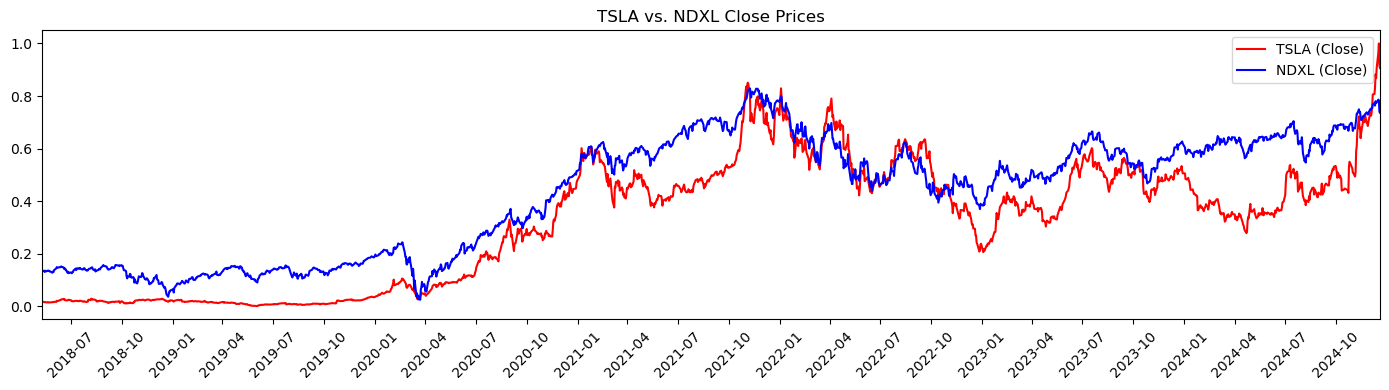

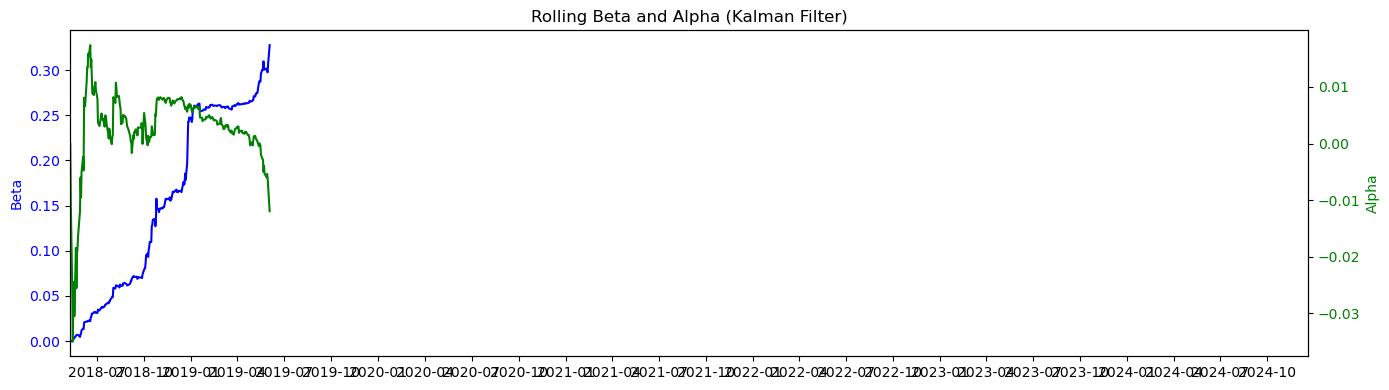

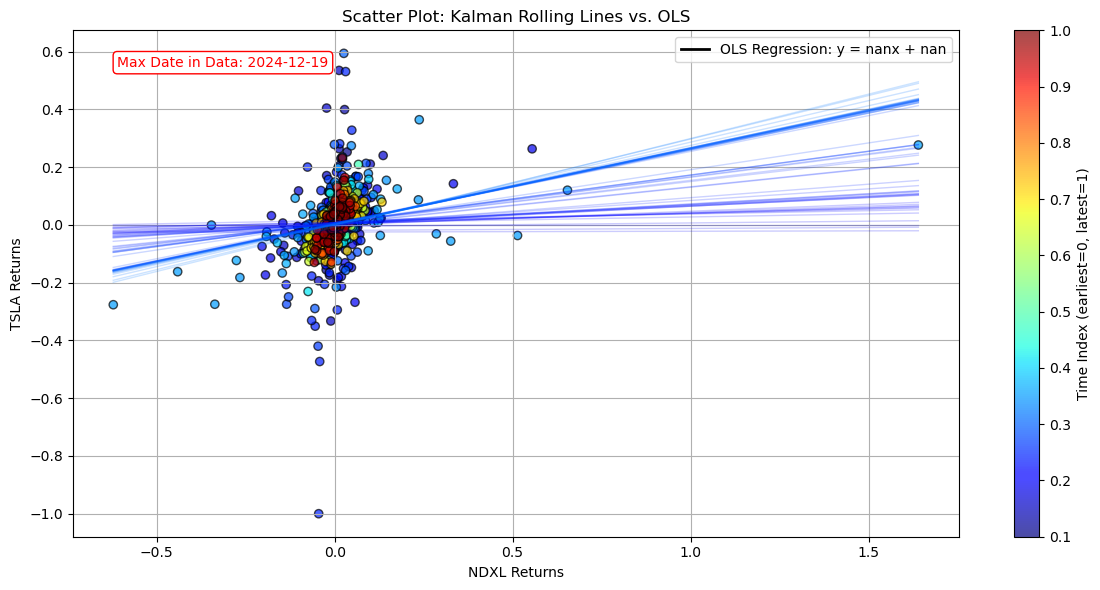


--- Final Diagnostics ---
Final DataFrame shape: (1665, 4)
Final date range: 2018-05-10 00:00:00-04:00 to 2024-12-19 00:00:00-05:00
State means shape: (1665, 2)
Number of data points in returns: 1665


In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pykalman import KalmanFilter

# ------------------------------------------------------------------------
# 1. Load and clean TSLA data
# ------------------------------------------------------------------------
tsla_data = pd.read_csv(
    '/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/TSLA_Normalised_OHLC_VWAP_VOL.csv',
    parse_dates=True,
    index_col='Date'
)
tsla_data.rename(columns=lambda x: x.strip(), inplace=True)
tsla_data = tsla_data.loc[~tsla_data.index.duplicated(keep='first')]

# ------------------------------------------------------------------------
# 2. Load and clean NDXL data
# ------------------------------------------------------------------------
ndxl_data = pd.read_csv(
    '/Users/jivenchana/Documents/TSLA-Model-v1.6/DataCsv/NDXL_Normalised_OHLC_VWAP_VOL.csv',
    parse_dates=True,
    index_col='Date'
)
ndxl_data.rename(columns=lambda x: x.strip(), inplace=True)
ndxl_data = ndxl_data.loc[~ndxl_data.index.duplicated(keep='first')]

# ------------------------------------------------------------------------
# 3. Concatenate (outer join) TSLA and NDXL close prices
# ------------------------------------------------------------------------
data = pd.concat([tsla_data['Close_Price'], ndxl_data['Close_Price']], 
                 axis=1, join='outer')
data.columns = ['TSLA', 'NDXL']

# Sort and forward/backward fill to ensure no NaNs
data.sort_index(inplace=True)
data.ffill(inplace=True)
data.bfill(inplace=True)

# ------------------------------------------------------------------------
# 4. Calculate returns
# ------------------------------------------------------------------------
data['TSLA_returns'] = data['TSLA'].pct_change().fillna(0)
data['NDXL_returns'] = data['NDXL'].pct_change().fillna(0)

# ------------------------------------------------------------------------
# 5. Prepare the observation matrix for the Kalman Filter
# ------------------------------------------------------------------------
obs_mat = np.vstack([data['NDXL_returns'], np.ones(data['NDXL_returns'].shape[0])]).T

# ------------------------------------------------------------------------
# 6. Initialize and run the Kalman Filter
# ------------------------------------------------------------------------
delta = 1e-5
trans_cov = delta / (1 - delta) * np.eye(2)
kf = KalmanFilter(
    n_dim_obs=1,              # y is 1-dimensional (TSLA returns)
    n_dim_state=2,            # (beta, alpha)
    initial_state_mean=np.zeros(2),
    initial_state_covariance=np.eye(2),
    transition_matrices=np.eye(2),
    observation_matrices=obs_mat[:, np.newaxis],
    observation_covariance=1.0,
    transition_covariance=trans_cov
)
state_means, state_covs = kf.filter(data['TSLA_returns'].values)

# ------------------------------------------------------------------------
# 7. Plot TSLA and NDXL to confirm the date range
# ------------------------------------------------------------------------
fig1, ax1 = plt.subplots(figsize=(14, 4))
ax1.plot(data.index, data['TSLA'], label='TSLA (Close)', color='red')
ax1.plot(data.index, data['NDXL'], label='NDXL (Close)', color='blue')
ax1.set_title('TSLA vs. NDXL Close Prices')
ax1.legend()

# Explicit monthly/quarterly ticks to see the entire timeline
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # or mdates.YearLocator()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.set_xlim([data.index.min(), data.index.max()])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------
# 8. Plot Beta and Alpha on one chart with twin y‐axes
# ------------------------------------------------------------------------
fig2, ax_beta = plt.subplots(figsize=(14, 4))

# Plot Beta on the left axis
ax_beta.plot(data.index, state_means[:, 0], color='blue', label='Beta')
ax_beta.set_ylabel('Beta', color='blue')
ax_beta.tick_params(axis='y', labelcolor='blue')

# Twin axis for Alpha
ax_alpha = ax_beta.twinx()
ax_alpha.plot(data.index, state_means[:, 1], color='green', label='Alpha')
ax_alpha.set_ylabel('Alpha', color='green')
ax_alpha.tick_params(axis='y', labelcolor='green')

# Force the full x-axis range and set monthly ticks
ax_beta.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax_beta.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax_beta.set_xlim([data.index.min(), data.index.max()])
plt.xticks(rotation=45)

# Title & layout
plt.title('Rolling Beta and Alpha (Kalman Filter)')
fig2.tight_layout()
plt.show()

# ------------------------------------------------------------------------
# 9. Scatter plot with rolling regression lines
# ------------------------------------------------------------------------
fig3 = plt.figure(figsize=(12, 6))
colors = np.linspace(0.1, 1, len(data))
scatter = plt.scatter(
    data['NDXL_returns'], data['TSLA_returns'],
    c=colors, cmap='jet', edgecolor='k', alpha=0.7
)
cb = plt.colorbar(scatter)
cb.set_label('Time Index (earliest=0, latest=1)')

# Add every 5th regression line
step = 5
xi = np.linspace(data['NDXL_returns'].min(), data['NDXL_returns'].max(), 100)
colors_step = np.linspace(0.1, 1, len(state_means[::step]))
for i, (beta, alpha) in enumerate(state_means[::step]):
    yi = beta * xi + alpha
    plt.plot(xi, yi, alpha=0.2, lw=1, color=plt.cm.jet(colors_step[i]))

# Add OLS regression line for comparison
ols_beta, ols_alpha = np.polyfit(data['NDXL_returns'], data['TSLA_returns'], 1)
ols_line = ols_beta * xi + ols_alpha
plt.plot(xi, ols_line, color='black', lw=2,
         label=f'OLS Regression: y = {ols_beta:.2f}x + {ols_alpha:.2f}')

# Annotate the maximum date just to confirm it’s included:
max_date_str = str(data.index.max().date())
plt.text(0.05, 0.95, f"Max Date in Data: {max_date_str}", 
         transform=plt.gca().transAxes, va='top', color='red',
         bbox=dict(boxstyle='round', fc='white', ec='red'))

plt.xlabel('NDXL Returns')
plt.ylabel('TSLA Returns')
plt.legend()
plt.grid(True)
plt.title('Scatter Plot: Kalman Rolling Lines vs. OLS')
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------
# 10. Final Diagnostics
# ------------------------------------------------------------------------
print("\n--- Final Diagnostics ---")
print("Final DataFrame shape:", data.shape)
print("Final date range:", data.index.min(), "to", data.index.max())
print("State means shape:", state_means.shape)
print("Number of data points in returns:", len(data['TSLA_returns']))